Notebook to check the degradation correction factors and what different vesions look like

04-Nov-2020 IGH


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from astropy import time
from astropy.visualization import time_support
from astropy.time import TimeDelta
import astropy.units as u
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

from aiapy.calibrate import degradation
from aiapy.calibrate.util import get_correction_table

In [2]:
# Load in the correction table here to speed things up
# So I could loop over many times if I want to 
# Like Will does here https://aiapy.readthedocs.io/en/latest/generated/gallery/instrument_degradation.html#sphx-glr-generated-gallery-instrument-degradation-py
correction_table = get_correction_table()


In [3]:
# print(correction_table.keys())
print(correction_table['DATE'][0],correction_table['DATE'][-1])
# print(correction_table['VER_NUM'])

2010-11-23T00:00:00Z 2020-07-06T21:54:28Z


In [4]:
# First let's just look at how the degradation changes over time again using
# https://aiapy.readthedocs.io/en/latest/generated/gallery/instrument_degradation.html
channels = [94, 131, 171, 193, 211, 335] * u.angstrom
tims_0 = time.Time('2010-06-01T00:00:00', scale='utc')
now = time.Time.now()
tims = tims_0 + np.arange(0, (now - tims_0).to(u.day).value, 7) * u.day
deg10 = {}
deg9 = {}
#  if no calibration_version given it appears to default o v9 in aiapy 0.3.0
for c in channels:
    deg10[c] = degradation(c, tims, correction_table=correction_table,calibration_version=10) 
    deg9[c] = degradation(c, tims, correction_table=correction_table,calibration_version=9)

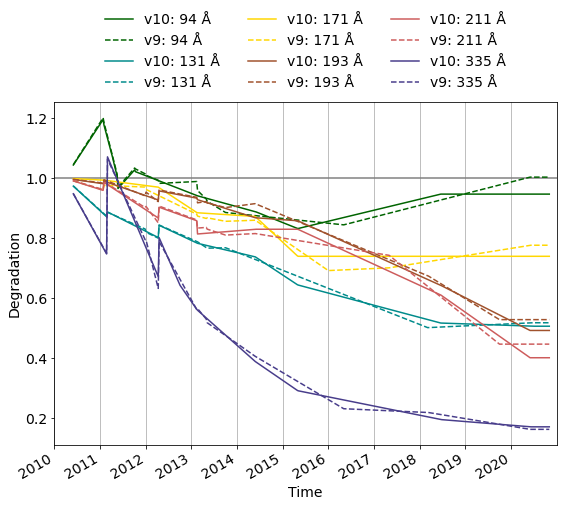

In [5]:
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue','cornflowerblue']
time_support()  # Pass astropy.time.Time directly to matplotlib

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(9, 7))
ax = fig.gca()
timerng=time.Time([2010,2021],format='decimalyear')
ax.plot(timerng,[1,1],color='grey')

i=0 # iterate index for colors
for c in channels:
    ax.plot(tims, deg10[c], label=f'v10: {c.value:.0f} Å',color=clrs[i])
    ax.plot(tims, deg9[c], label=f'v9: {c.value:.0f} Å',color=clrs[i],linestyle='dashed')
    i+=1

ax.set_xlim(timerng)
ax.set_xticks(time.Time(np.arange(2010,2021,1),format='decimalyear'))
ax.legend(frameon=False, ncol=3, bbox_to_anchor=(0.5, 1), loc='lower center')
ax.set_xlabel('Time')
ax.set_ylabel('Degradation')
fig.autofmt_xdate()
plt.grid(True,axis='x')
plt.show()